# Д/З № 3

## Студеикина Мария Александровна

In [1]:
# Подключение нужных библиотек
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import *
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import keras.preprocessing.image

/Users/manya/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Задание нужных переменных, которые нам понадобятся позже
ROOT = Path('/Users/manya/Desktop/семестр 3/СКА/kaggle_bee_vs_wasp/')
SEED = 0
IMG_SIZE = 256
BATCH_SIZE = 32
labels = ['bee', 'wasp', 'insect']
table_data = []

In [3]:
# Загрузка данных и меняем столбец path для удобства
df = pd.read_csv(str(ROOT / 'labels.csv'))
df['path'] = [row.replace('\\', os.sep) for row in df['path']]
df.head()

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1/10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1/10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1/10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1/1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1/10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee


In [4]:
# Функция, которая в зависимости от 'label' ('bee', 'wasp', 'incect'), выводит изображения, и общее количество образцов, 
# количество образцов низкого качества, высокого качества, количество обучающих, проверочных и тестовых образцов
def read_data(df, label, n_samples=5):
    q = df[df['label'] == label]
    samples = q.sample(n=n_samples)

    fig, ax = plt.subplots(nrows=1, ncols=n_samples, figsize=(4*n_samples,4))
    for i, path in enumerate(samples['path']):
        img = cv.imread(str(ROOT / path), -1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].axis('off')
    fig.suptitle(f'Label: {label}')
    plt.show()

    n = len(q)
    low = len(q[q['photo_quality'] == 0])
    val = len(q[q['is_validation'] == 1])
    test = len(q[q['is_final_validation'] == 1])
    print(f'Total number of samples for {label}: {n}')
    if label == 'bee' or label == 'wasp':
        print(f'Number of low quality samples: {low}')
        print(f'Number of high quality samples: {n - low}')
    print(f'Number of training samples: {n - val - test}')
    print(f'Number of validation samples: {val}')
    print(f'Number of testing samples: {test}')

Работа функции и вывод информации

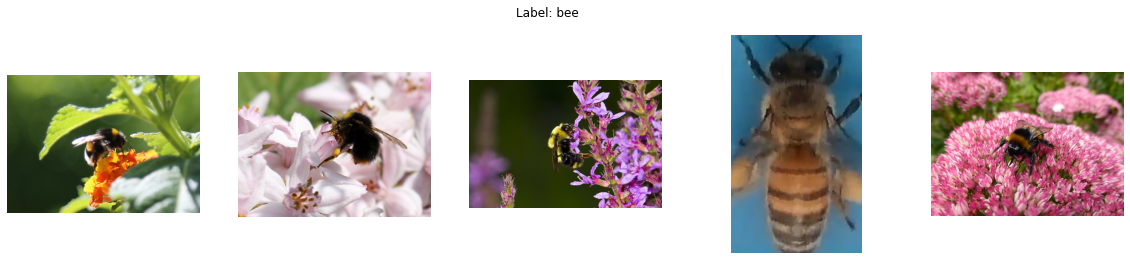

Total number of samples for bee: 3183
Number of low quality samples: 714
Number of high quality samples: 2469
Number of training samples: 2195
Number of validation samples: 484
Number of testing samples: 504


In [5]:
read_data(df, label=labels[0])

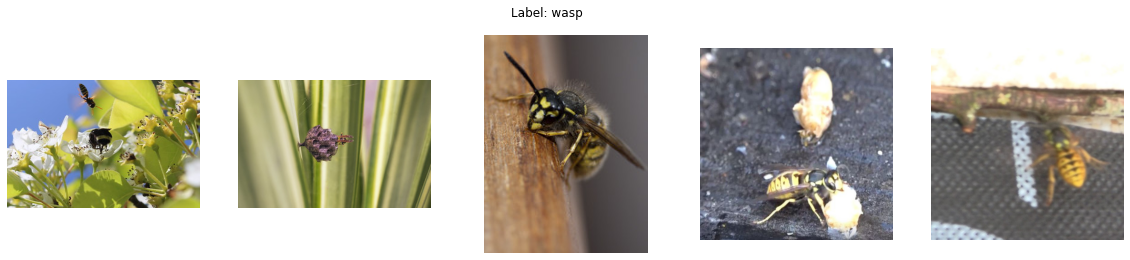

Total number of samples for wasp: 4943
Number of low quality samples: 2816
Number of high quality samples: 2127
Number of training samples: 3440
Number of validation samples: 750
Number of testing samples: 753


In [6]:
read_data(df, label=labels[1])

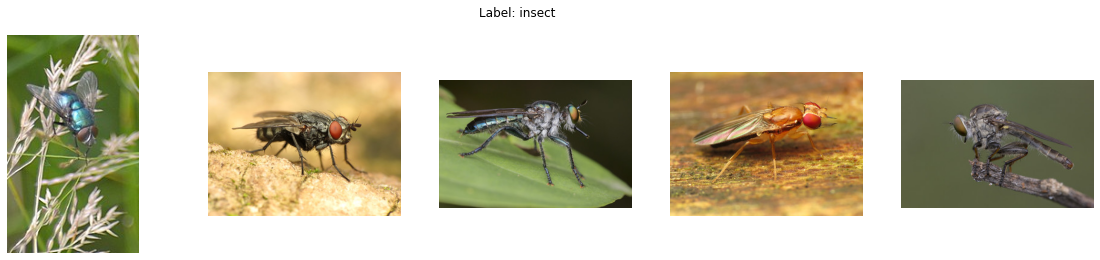

Total number of samples for insect: 2439
Number of training samples: 1706
Number of validation samples: 357
Number of testing samples: 376


In [7]:
read_data(df, label=labels[2])

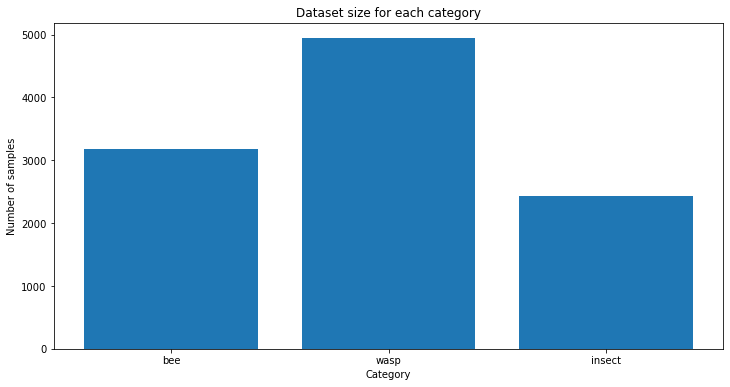

In [8]:
# Столбчатая диаграмма, которая показывает количество пчел, ос и других насекомых
plt.figure(figsize=(12, 6))
plt.bar(labels, [len(df[df['label'] == label]) for label in labels])
plt.title('Dataset size for each category')
plt.xlabel('Category')
plt.ylabel('Number of samples')
plt.show()

In [9]:
# Разделение на тестовую, тренировочную и валидационную выборки
train_df = df[(df['is_validation'] == 0) & (df['is_final_validation'] == 0)].reset_index(drop=True)
val_df = df[df['is_validation'] == 1].reset_index(drop=True)
test_df = df[df['is_final_validation'] == 1].reset_index(drop=True)

В данном коде происходит разделение исходного DataFrame `df` на три новых DataFrame: `train_df`, `val_df` и `test_df`.

В первой строке:
- `df['is_validation'] == 0` означает, что выбираются только те строки, где значение в столбце "is_validation" равно 0.
- `df['is_final_validation'] == 0` означает, что выбираются только те строки, где значение в столбце "is_final_validation" равно 0.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `train_df` будет содержать только те строки из `df`, где "is_validation" и "is_final_validation" имеют значение 0.

Во второй строке:
- `df['is_validation'] == 1` означает, что выбираются только те строки, где значение в столбце "is_validation" равно 1.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `val_df` будет содержать только те строки из `df`, где "is_validation" имеет значение 1.

В третьей строке:
- `df['is_final_validation'] == 1` означает, что выбираются только те строки, где значение в столбце "is_final_validation" равно 1.
- `reset_index(drop=True)` сбрасывает индекс строки и создает новый индекс, начиная с нуля.
Таким образом, `test_df` будет содержать только те строки из `df`, где "is_final_validation" имеет значение 1.

Эти операции позволяют разделить исходный DataFrame на отдельные части в соответствии с условиями для дальнейшего использования в алгоритмах обучения, валидации и тестирования модели.

In [10]:
# Вывод тренировочной выборки для визуальной проверки
train_df

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1/10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,5,bee1/10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
2,6,bee1/10130729734_f68738333e_w.jpg,1,0,0,0,1,0,0,bee
3,7,bee1/10166485783_9cd6706c72_n.jpg,1,0,0,0,1,0,0,bee
4,8,bee1/10179824_84803290ac_m.jpg,1,0,0,0,1,0,0,bee
...,...,...,...,...,...,...,...,...,...,...
7934,11406,other_noinsect/580930.jpg,0,0,0,1,0,0,0,other
7935,11407,other_noinsect/580942.jpg,0,0,0,1,0,0,0,other
7936,11408,other_noinsect/580943.jpg,0,0,0,1,0,0,0,other
7937,11412,other_noinsect/581206.jpg,0,0,0,1,0,0,0,other


In [11]:
# Предобработка: приведение значений пикселов входных изображений к интервалу [0,1]
datagen = preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_datagen = datagen.flow_from_dataframe(train_df, 
                                            directory=str(ROOT), 
                                            x_col='path', 
                                            y_col='label',
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            seed=SEED
                                           ) 

val_datagen = datagen.flow_from_dataframe(val_df,
                                            directory=str(ROOT), 
                                            x_col='path', 
                                            y_col='label',
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            seed=SEED
                                           ) 

test_datagen = datagen.flow_from_dataframe(test_df, 
                                           directory=str(ROOT), 
                                           x_col='path', 
                                           y_col='label',
                                           target_size=(IMG_SIZE, IMG_SIZE),
                                           seed=SEED
                                           ) 

Found 7939 validated image filenames belonging to 4 classes.
Found 1719 validated image filenames belonging to 4 classes.
Found 1763 validated image filenames belonging to 4 classes.


Использую библиотеку Keras для обработки и подготовки изображений для обучения НС. 

Первая строка создает объект класса ImageDataGenerator, который предоставляет удобные методы для аугментации и нормализации изображений. В данном случае, rescale=1./255. указывает, что значения пикселей изображений должны быть масштабированы до диапазона от 0 до 1 путем деления на 255.

Вторая, третья и четвертая строки создают еще один объект класса ImageDataGenerator, но уже с чуть большими настройками. flow_from_dataframe - это метод, который принимает в качестве параметров train_df/val_df/test_df - это объект DataFrame, который содержит информацию о путях к изображениям и их метках, directory - путь к директории, содержащей изображения, x_col - имя столбца с путями к изображениям, y_col - имя столбца с метками изображений, target_size - размер целевого изображения, и seed - параметр для генерации случайных чисел. 

Это позволяет автоматически загружать изображения из директории, масштабировать их и преобразовывать в тензоры, готовые для использования в модели.

In [12]:
train_X = train_datagen
train_Y = None
validation_all = val_datagen
test_X = test_datagen
test_Y = None

In [14]:
# Создание модели CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

Модели нейронной сети с использованием библиотеки Keras в Python.

`model = keras.Sequential()` создает последовательную модель, которая позволяет добавлять слои последовательно.

Слои:

- `tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(SIZE, SIZE, 3))`: Этот слой представляет сверточный слой (convolutional layer) с 32 фильтрами размером 3x3. Он использует функцию активации ReLU и ожидает входной тензор размером `(IMG_SIZE, IMG_SIZE, 3)`, где `IMG_SIZE` - это размер входного изображения, а 3 - количество каналов (RGB).

- `tf.keras.layers.MaxPooling2D(pool_size=(2, 2))`: Этот слой представляет собой слой максимальной пулинга (max pooling layer) с окном пулинга размером 2x2. Он уменьшает пространственные размеры тензора на выходе предыдущего слоя, выбирая максимальное значение из каждой области пулинга.

- `tf.keras.layers.Flatten()`: Этот слой выполняет операцию выравнивания (flattening), которая преобразует многомерный тензор в одномерный.

- `tf.keras.layers.Dense(units=64, activation='relu')`: Этот слой представляет полносвязный слой (fully connected layer) с 64 нейронами. Он использует функцию активации ReLU.

- `tf.keras.layers.Dense(units=4, activation='softmax')`: Этот слой также представляет полносвязный слой, но с 4 нейронами, которые представляют классы или категории, к которым относятся входные данные. Он использует функцию активации softmax для предсказания вероятностей отнесения входных данных к каждому классу.

Я использовала функцию активации ReLU для сверточного и полносвязного слоев, так как она обычно дает хорошие результаты в большинстве случаев.

In [15]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 64)                33032256  
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 33033412 (126.01 MB)
Trainable params: 33033412 (126.01 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [16]:
# Обучение модели
history = model.fit(x=train_X, y=train_Y, epochs=3, validation_data=validation_all)

Epoch 1/3
249/249 [==============================] - 111s 442ms/step - loss: 0.4534 - accuracy: 0.5858 - val_loss: 0.3789 - val_accuracy: 0.6661
Epoch 2/3
249/249 [==============================] - 107s 426ms/step - loss: 0.3458 - accuracy: 0.6937 - val_loss: 0.3483 - val_accuracy: 0.6946
Epoch 3/3
249/249 [==============================] - 120s 481ms/step - loss: 0.3038 - accuracy: 0.7452 - val_loss: 0.3251 - val_accuracy: 0.7161


1. model.compile(...): Компиляция модели нейронной сети. Здесь определяются оптимизатор, функция потерь и метрики, используемые для обучения модели. optimizer указывает метод оптимизации (в данном случае используется Adam с заданной скоростью обучения 0.0001). loss определяет функцию потерь, которая используется для оценки ошибки модели при обучении. metrics указывает метрики, которые будут рассчитываться во время обучения модели (в данном случае указана точность).

2. model.summary(): Выводит краткое описание архитектуры модели, включая количество параметров в каждом слое и общую структуру модели.

3. history = model.fit(...): Обучение модели. x и y представляют собой обучающие данные и соответствующие метки. epochs указывает количество эпох обучения (эпоха - это один проход через все обучающие данные). validation_data представляет данные валидации, которые используются для оценки производительности модели во время обучения.

После выполнения этих операций модель будет обучена и ее история обучения будет доступна в переменной history, которую можно использовать, например, для визуализации процесса обучения.

In [17]:
# Оценка точности на тестовой выборке
test_loss, test_acc = model.evaluate(train_X, train_Y)
print(f'Test accuracy: {test_acc}')

249/249 [==============================] - 24s 95ms/step - loss: 0.2633 - accuracy: 0.7735
Test accuracy: 0.7735230922698975


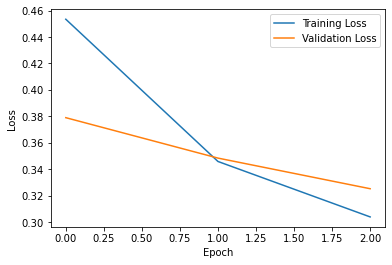

In [18]:
# Функция потерь и точность при обучении
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, train_Y))

In [ ]:
from sklearn.metrics import f1_score
f_1 = f1_score(test_Y, train_Y)
print(f_1)